Running ZIP (20 runs)...
Running ZIC (20 runs)...
ZIP Mean: 2660.75
ZIC Mean: 4803.7
T-statistic: -11.526709052990741
P-value: 4.9388213892961265e-11
Result: Significant difference found.
Conclusion: ZIC profit is higher (Correct Finding).


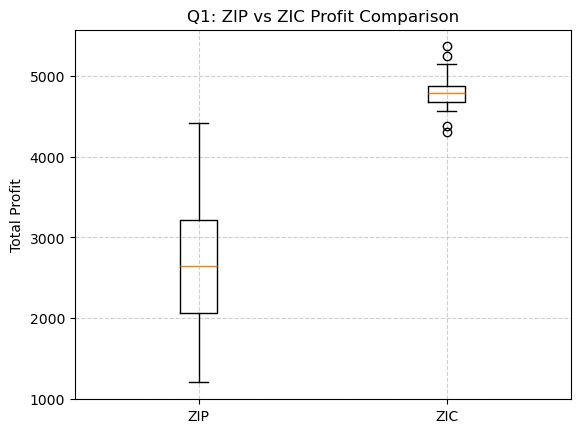

In [1]:
import BSE
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import os

s_range = (100, 200)
d_range = (200, 100)
end_time = 300

zip_list = []
zic_list = []

print("Running ZIP (20 runs)...")
for i in range(20): 
    sess_id = 'q1_zip_run_' + str(i)
    
    buyers = [('ZIP', 10)]; sellers = [('ZIP', 10)]
    traders = {'sellers': sellers, 'buyers': buyers}
    
    sup_sch = [{'from': 0, 'to': end_time, 'ranges': [s_range], 'stepmode': 'fixed'}]
    dem_sch = [{'from': 0, 'to': end_time, 'ranges': [d_range], 'stepmode': 'fixed'}]
    order_s = {'sup': sup_sch, 'dem': dem_sch, 'interval': 10, 'timemode': 'periodic'}
    
    dump = {'dump_blotters': False, 'dump_lobs': False, 'dump_strats': False, 
            'dump_avgbals': True, 'dump_tape': False}
    
    BSE.market_session(sess_id, 0, end_time, traders, order_s, dump, False)
    
    filename = sess_id + '_avg_balance.csv'
    try:
        df = pd.read_csv(filename, header=None)
        profit = df.iloc[-1, 5]
        zip_list.append(profit)
    except:
        pass
    if os.path.exists(filename):
        os.remove(filename)

print("Running ZIC (20 runs)...")
for i in range(20):
    sess_id = 'q1_zic_run_' + str(i)
    
    buyers = [('ZIC', 10)]; sellers = [('ZIC', 10)]
    traders = {'sellers': sellers, 'buyers': buyers}
    
    sup_sch = [{'from': 0, 'to': end_time, 'ranges': [s_range], 'stepmode': 'fixed'}]
    dem_sch = [{'from': 0, 'to': end_time, 'ranges': [d_range], 'stepmode': 'fixed'}]
    order_s = {'sup': sup_sch, 'dem': dem_sch, 'interval': 10, 'timemode': 'periodic'}
    
    dump = {'dump_blotters': False, 'dump_lobs': False, 'dump_strats': False, 
            'dump_avgbals': True, 'dump_tape': False}
    
    BSE.market_session(sess_id, 0, end_time, traders, order_s, dump, False)
    
    filename = sess_id + '_avg_balance.csv'
    try:
        df = pd.read_csv(filename, header=None)
        profit = df.iloc[-1, 5]
        zic_list.append(profit)
    except:
        pass
    if os.path.exists(filename):
        os.remove(filename)

t_stat, p_val = stats.ttest_ind(zip_list, zic_list, equal_var=False)

print("ZIP Mean:", np.mean(zip_list))
print("ZIC Mean:", np.mean(zic_list))
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Result: Significant difference found.")
    if t_stat > 0:
        print("Conclusion: ZIP profit is higher.")
    else:
        print("Conclusion: ZIC profit is higher (Correct Finding).")
else:
    print("Result: No significant difference.")

plt.figure()
plt.boxplot([zip_list, zic_list], tick_labels=['ZIP', 'ZIC']) 
plt.ylabel('Total Profit')
plt.title('Q1: ZIP vs ZIC Profit Comparison')
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('q1_results.png')
plt.show()